In [54]:
import pandas as pd
import numpy as np
import matplotlib as mp 
import matplotlib.pyplot as plt


Abertura e Carregamento de Dados

In [55]:
#Extraindo dados de um arquivo cCSV
df=pd.read_csv('INMET_MS_ITAQUIRAI_2020.CSV', delimiter=';',skiprows=8,encoding='latin1')
df

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2020/01/01,0000 UTC,",6",970,970,"969,5",NaN,"23,1","22,6","23,1","22,6","22,8","21,6",98.0,94.0,97.0,11.0,"3,2","1,9",NaN
1,2020/01/01,0100 UTC,0,"970,2","970,2",970,"2,9","23,7","21,7","23,7",23,"22,5","21,6",97.0,88.0,88.0,10.0,"4,6","1,3",NaN
2,2020/01/01,0200 UTC,0,"969,8","970,2","969,8","1,6",24,"21,8","24,4","23,7","21,9","21,2",88.0,83.0,88.0,345.0,"3,2",",6",NaN
3,2020/01/01,0300 UTC,0,"970,1","970,1","969,8",",6","24,3","21,4","25,1",24,22,"21,2",88.0,80.0,83.0,332.0,"4,8","1,5",NaN
4,2020/01/01,0400 UTC,0,"970,2","970,5","970,1",NaN,"23,8","21,7","24,3","23,7","21,8","21,4",89.0,83.0,89.0,316.0,"3,3",",2",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020/12/31,1900 UTC,",4","972,6","973,3","972,6","775,9","23,1","22,7","23,3","21,7",NaN,NaN,NaN,NaN,97.0,32.0,"6,6","1,2",NaN
8780,2020/12/31,2000 UTC,0,"970,4","972,6","970,4","837,8","24,2","22,7","24,4","23,1","22,8","22,1",97.0,89.0,91.0,355.0,"2,8",",8",NaN
8781,2020/12/31,2100 UTC,0,"970,7","970,7","970,1","524,7","24,9",23,"24,9","24,1","23,3","22,5",93.0,89.0,89.0,315.0,"4,2","1,2",NaN
8782,2020/12/31,2200 UTC,0,"972,4","972,4","970,7","256,5","24,2","22,1","25,1","24,2","23,1","22,1",89.0,87.0,88.0,291.0,"4,8",",9",NaN


In [56]:
#Filtrando as colunas que serao usadas
df = df[['Data','Hora UTC','PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)','TEMPERATURA DO PONTO DE ORVALHO (°C)','UMIDADE RELATIVA DO AR, HORARIA (%)', 'RADIACAO GLOBAL (Kj/m²)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))' ,'VENTO, VELOCIDADE HORARIA (m/s)']]

In [57]:
#Primeiras linhas
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020/01/01,0000 UTC,",6","23,1","22,6",97.0,NaN,11.0,"1,9"
1,2020/01/01,0100 UTC,0,"23,7","21,7",88.0,"2,9",10.0,"1,3"
2,2020/01/01,0200 UTC,0,24,"21,8",88.0,"1,6",345.0,",6"
3,2020/01/01,0300 UTC,0,"24,3","21,4",83.0,",6",332.0,"1,5"
4,2020/01/01,0400 UTC,0,"23,8","21,7",89.0,NaN,316.0,",2"


In [58]:
#Últimas linhas
df.tail()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
8779,2020/12/31,1900 UTC,",4","23,1","22,7",97.0,"775,9",32.0,"1,2"
8780,2020/12/31,2000 UTC,0,"24,2","22,7",91.0,"837,8",355.0,",8"
8781,2020/12/31,2100 UTC,0,"24,9",23,89.0,"524,7",315.0,"1,2"
8782,2020/12/31,2200 UTC,0,"24,2","22,1",88.0,"256,5",291.0,",9"
8783,2020/12/31,2300 UTC,0,"23,5","22,5",94.0,"9,6",132.0,",9"


In [59]:
#Retorna a quantidade de linhas e colunas
df.shape

(8784, 9)

In [60]:
#Estatísticas das colunas númericas
#OBS: As outras colunas devem ser tratadas para float
df.describe()

,"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))"
count,8318.000000,8778.000000
mean,66.817264,185.015835
std,19.456590,81.669629
min,14.000000,1.000000
25%,52.000000,133.000000
50%,69.000000,171.000000
75%,83.000000,254.000000
max,100.000000,360.000000


In [61]:
#Imprime as quantidades de valores nao nulos e os tipos de dados em cada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Data                                          8784 non-null   object 
 1   Hora UTC                                      8784 non-null   object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)              8778 non-null   object 
 3   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  8778 non-null   object 
 4   TEMPERATURA DO PONTO DE ORVALHO (°C)          8318 non-null   object 
 5   UMIDADE RELATIVA DO AR, HORARIA (%)           8318 non-null   float64
 6   RADIACAO GLOBAL (Kj/m²)                       4735 non-null   object 
 7   VENTO, DIREÇÃO HORARIA (gr) (° (gr))          8778 non-null   float64
 8   VENTO, VELOCIDADE HORARIA (m/s)               8778 non-null   object 
dtypes: float64(2), object(7)
memory usage: 617.8+ KB


In [62]:
#Transformar as vírgulas em pontos 
df=df.replace(',', '.', regex=True)

In [63]:
#Converter de object para float as colunas necessárias
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = pd.to_numeric(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], errors='coerce')
df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] = pd.to_numeric(df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], errors='coerce')
df['TEMPERATURA DO PONTO DE ORVALHO (°C)'] = pd.to_numeric(df['TEMPERATURA DO PONTO DE ORVALHO (°C)'], errors='coerce')
df['RADIACAO GLOBAL (Kj/m²)'] = pd.to_numeric(df['RADIACAO GLOBAL (Kj/m²)'], errors='coerce')
df['VENTO, VELOCIDADE HORARIA (m/s)'] = pd.to_numeric(df['VENTO, VELOCIDADE HORARIA (m/s)'], errors='coerce')


In [64]:
#Conferindo a conversao 
df.dtypes

Data                                             object
Hora UTC                                         object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)    float64
TEMPERATURA DO PONTO DE ORVALHO (°C)            float64
UMIDADE RELATIVA DO AR, HORARIA (%)             float64
RADIACAO GLOBAL (Kj/m²)                         float64
VENTO, DIREÇÃO HORARIA (gr) (° (gr))            float64
VENTO, VELOCIDADE HORARIA (m/s)                 float64
dtype: object

In [65]:
#Retorna a quantidade de valores nulos em cada coluna
df.isnull().sum()

Data                                               0
Hora UTC                                           0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                   6
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)       6
TEMPERATURA DO PONTO DE ORVALHO (°C)             466
UMIDADE RELATIVA DO AR, HORARIA (%)              466
RADIACAO GLOBAL (Kj/m²)                         4049
VENTO, DIREÇÃO HORARIA (gr) (° (gr))               6
VENTO, VELOCIDADE HORARIA (m/s)                    6
dtype: int64

In [66]:
#Subistituir valores nulos pra 0
df=df.fillna(0)

In [67]:
#Quantidade de valores nulos em cada coluna após a substituiçao
df.isnull().sum()
df

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020/01/01,0000 UTC,0.6,23.1,22.6,97.0,0.0,11.0,1.9
1,2020/01/01,0100 UTC,0.0,23.7,21.7,88.0,2.9,10.0,1.3
2,2020/01/01,0200 UTC,0.0,24.0,21.8,88.0,1.6,345.0,0.6
3,2020/01/01,0300 UTC,0.0,24.3,21.4,83.0,0.6,332.0,1.5
4,2020/01/01,0400 UTC,0.0,23.8,21.7,89.0,0.0,316.0,0.2
...,...,...,...,...,...,...,...,...,...
8779,2020/12/31,1900 UTC,0.4,23.1,22.7,97.0,775.9,32.0,1.2
8780,2020/12/31,2000 UTC,0.0,24.2,22.7,91.0,837.8,355.0,0.8
8781,2020/12/31,2100 UTC,0.0,24.9,23.0,89.0,524.7,315.0,1.2
8782,2020/12/31,2200 UTC,0.0,24.2,22.1,88.0,256.5,291.0,0.9


Tratamento de Dados

In [68]:
#Normalizar coluna UMIDADE RELATIVA DO AR, HORARIA (%), pois é a única que está em porcentagem
df['UMIDADE RELATIVA DO AR, HORARIA (%)']=(df['UMIDADE RELATIVA DO AR, HORARIA (%)']- df['UMIDADE RELATIVA DO AR, HORARIA (%)'].min())/(df['UMIDADE RELATIVA DO AR, HORARIA (%)'].max()-df['UMIDADE RELATIVA DO AR, HORARIA (%)'].min())
df

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020/01/01,0000 UTC,0.6,23.1,22.6,0.97,0.0,11.0,1.9
1,2020/01/01,0100 UTC,0.0,23.7,21.7,0.88,2.9,10.0,1.3
2,2020/01/01,0200 UTC,0.0,24.0,21.8,0.88,1.6,345.0,0.6
3,2020/01/01,0300 UTC,0.0,24.3,21.4,0.83,0.6,332.0,1.5
4,2020/01/01,0400 UTC,0.0,23.8,21.7,0.89,0.0,316.0,0.2
...,...,...,...,...,...,...,...,...,...
8779,2020/12/31,1900 UTC,0.4,23.1,22.7,0.97,775.9,32.0,1.2
8780,2020/12/31,2000 UTC,0.0,24.2,22.7,0.91,837.8,355.0,0.8
8781,2020/12/31,2100 UTC,0.0,24.9,23.0,0.89,524.7,315.0,1.2
8782,2020/12/31,2200 UTC,0.0,24.2,22.1,0.88,256.5,291.0,0.9


In [69]:
# Convertendo a coluna 'Data' para datetime 
df['Data']=pd.to_datetime(df['Data'], format='%Y/%m/%d')

In [70]:
# Convertendo a coluna 'Data para o formato brasileiro DD/MM/YYYY
df['Data']=df['Data'].dt.strftime('%d/%m/%Y')
df

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2020,0000 UTC,0.6,23.1,22.6,0.97,0.0,11.0,1.9
1,01/01/2020,0100 UTC,0.0,23.7,21.7,0.88,2.9,10.0,1.3
2,01/01/2020,0200 UTC,0.0,24.0,21.8,0.88,1.6,345.0,0.6
3,01/01/2020,0300 UTC,0.0,24.3,21.4,0.83,0.6,332.0,1.5
4,01/01/2020,0400 UTC,0.0,23.8,21.7,0.89,0.0,316.0,0.2
...,...,...,...,...,...,...,...,...,...
8779,31/12/2020,1900 UTC,0.4,23.1,22.7,0.97,775.9,32.0,1.2
8780,31/12/2020,2000 UTC,0.0,24.2,22.7,0.91,837.8,355.0,0.8
8781,31/12/2020,2100 UTC,0.0,24.9,23.0,0.89,524.7,315.0,1.2
8782,31/12/2020,2200 UTC,0.0,24.2,22.1,0.88,256.5,291.0,0.9


In [71]:
#Converter a coluna 'Hora UTC', para um formato de hora '%H:%M'.
df['Hora UTC'] = pd.to_datetime(df['Hora UTC'], format='%H%M UTC', errors='coerce').dt.strftime('%H:%M')

df

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2020,00:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9
1,01/01/2020,01:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3
2,01/01/2020,02:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6
3,01/01/2020,03:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5
4,01/01/2020,04:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2
...,...,...,...,...,...,...,...,...,...
8779,31/12/2020,19:00,0.4,23.1,22.7,0.97,775.9,32.0,1.2
8780,31/12/2020,20:00,0.0,24.2,22.7,0.91,837.8,355.0,0.8
8781,31/12/2020,21:00,0.0,24.9,23.0,0.89,524.7,315.0,1.2
8782,31/12/2020,22:00,0.0,24.2,22.1,0.88,256.5,291.0,0.9


In [72]:
#Criação de uma nova coluna para combinar Data e Hora
df['Data e Hora'] = df['Data'] + ' ' + df['Hora UTC']
df


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)",Data e Hora
0,01/01/2020,00:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9,01/01/2020 00:00
1,01/01/2020,01:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3,01/01/2020 01:00
2,01/01/2020,02:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6,01/01/2020 02:00
3,01/01/2020,03:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5,01/01/2020 03:00
4,01/01/2020,04:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2,01/01/2020 04:00
...,...,...,...,...,...,...,...,...,...,...
8779,31/12/2020,19:00,0.4,23.1,22.7,0.97,775.9,32.0,1.2,31/12/2020 19:00
8780,31/12/2020,20:00,0.0,24.2,22.7,0.91,837.8,355.0,0.8,31/12/2020 20:00
8781,31/12/2020,21:00,0.0,24.9,23.0,0.89,524.7,315.0,1.2,31/12/2020 21:00
8782,31/12/2020,22:00,0.0,24.2,22.1,0.88,256.5,291.0,0.9,31/12/2020 22:00


In [73]:
#Conversao da nova coluna para Datatime
df['Data e Hora'] = pd.to_datetime(df['Data e Hora'], format='%d/%m/%Y %H:%M', errors='coerce')
df

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)",Data e Hora
0,01/01/2020,00:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9,2020-01-01 00:00:00
1,01/01/2020,01:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3,2020-01-01 01:00:00
2,01/01/2020,02:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6,2020-01-01 02:00:00
3,01/01/2020,03:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5,2020-01-01 03:00:00
4,01/01/2020,04:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
8779,31/12/2020,19:00,0.4,23.1,22.7,0.97,775.9,32.0,1.2,2020-12-31 19:00:00
8780,31/12/2020,20:00,0.0,24.2,22.7,0.91,837.8,355.0,0.8,2020-12-31 20:00:00
8781,31/12/2020,21:00,0.0,24.9,23.0,0.89,524.7,315.0,1.2,2020-12-31 21:00:00
8782,31/12/2020,22:00,0.0,24.2,22.1,0.88,256.5,291.0,0.9,2020-12-31 22:00:00


In [74]:
#Criando uma nova coluna com a conversão para o Horário de Brasília:
df['Data e Hora BR'] = df['Data e Hora'].dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')
df

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)",Data e Hora,Data e Hora BR
0,01/01/2020,00:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9,2020-01-01 00:00:00,2019-12-31 21:00:00-03:00
1,01/01/2020,01:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3,2020-01-01 01:00:00,2019-12-31 22:00:00-03:00
2,01/01/2020,02:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6,2020-01-01 02:00:00,2019-12-31 23:00:00-03:00
3,01/01/2020,03:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5,2020-01-01 03:00:00,2020-01-01 00:00:00-03:00
4,01/01/2020,04:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2,2020-01-01 04:00:00,2020-01-01 01:00:00-03:00
...,...,...,...,...,...,...,...,...,...,...,...
8779,31/12/2020,19:00,0.4,23.1,22.7,0.97,775.9,32.0,1.2,2020-12-31 19:00:00,2020-12-31 16:00:00-03:00
8780,31/12/2020,20:00,0.0,24.2,22.7,0.91,837.8,355.0,0.8,2020-12-31 20:00:00,2020-12-31 17:00:00-03:00
8781,31/12/2020,21:00,0.0,24.9,23.0,0.89,524.7,315.0,1.2,2020-12-31 21:00:00,2020-12-31 18:00:00-03:00
8782,31/12/2020,22:00,0.0,24.2,22.1,0.88,256.5,291.0,0.9,2020-12-31 22:00:00,2020-12-31 19:00:00-03:00


In [75]:
#Formataçao da coluna 'Data e Hora BR' para o formato de data e hora brasileiro.
df['Data e Hora BR'] = df['Data e Hora BR'].dt.strftime('%d/%m/%Y %H:%M')
df

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)",Data e Hora,Data e Hora BR
0,01/01/2020,00:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9,2020-01-01 00:00:00,31/12/2019 21:00
1,01/01/2020,01:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3,2020-01-01 01:00:00,31/12/2019 22:00
2,01/01/2020,02:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6,2020-01-01 02:00:00,31/12/2019 23:00
3,01/01/2020,03:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5,2020-01-01 03:00:00,01/01/2020 00:00
4,01/01/2020,04:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2,2020-01-01 04:00:00,01/01/2020 01:00
...,...,...,...,...,...,...,...,...,...,...,...
8779,31/12/2020,19:00,0.4,23.1,22.7,0.97,775.9,32.0,1.2,2020-12-31 19:00:00,31/12/2020 16:00
8780,31/12/2020,20:00,0.0,24.2,22.7,0.91,837.8,355.0,0.8,2020-12-31 20:00:00,31/12/2020 17:00
8781,31/12/2020,21:00,0.0,24.9,23.0,0.89,524.7,315.0,1.2,2020-12-31 21:00:00,31/12/2020 18:00
8782,31/12/2020,22:00,0.0,24.2,22.1,0.88,256.5,291.0,0.9,2020-12-31 22:00:00,31/12/2020 19:00


In [82]:
#Estatísticas das colunas númericas após o tratamento
df.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)",Data e Hora
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
mean,0.151480,23.172837,15.201423,0.632725,759.334028,184.889458,1.939447,2020-07-01 23:30:00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020-01-01 00:00:00
25%,0.000000,19.500000,12.400000,0.490000,0.000000,133.000000,0.900000,2020-04-01 11:45:00
50%,0.000000,23.100000,16.000000,0.670000,23.100000,171.000000,1.800000,2020-07-01 23:30:00
75%,0.000000,27.100000,19.300000,0.820000,1434.250000,254.000000,2.800000,2020-10-01 11:15:00
max,44.800000,40.600000,25.800000,1.000000,4085.400000,360.000000,11.900000,2020-12-31 23:00:00
std,1.375679,5.725963,5.592551,0.241409,1077.034129,81.784719,1.405233,NaN


Análise de Dados

In [76]:
mediana_temperatura_bulbo=df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].median()
media_temperatura_bulbo=df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean()
minimo_temperatura_bulbo=df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].min()
maximo_temperatura_bulbo=df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].max()
print("A mediana da coluna RADIACAO GLOBAL é:" , mediana_temperatura_bulbo)
print("A Média da coluna RADIACAO GLOBAL é:" , media_temperatura_bulbo)
print("A Mínimo da coluna RADIACAO GLOBAL é:" , minimo_temperatura_bulbo)
print("A Máximo da coluna RADIACAO GLOBAL é:" , maximo_temperatura_bulbo)


A mediana da coluna RADIACAO GLOBAL é: 23.1
A Média da coluna RADIACAO GLOBAL é: 23.172836976320585
A Mínimo da coluna RADIACAO GLOBAL é: 0.0
A Máximo da coluna RADIACAO GLOBAL é: 40.6


In [77]:
#Agrupa a coluna DATA e RADIACAO GLOBAL (Kj/m²) e retorna a média pra cada linha
media_radiacao = df.groupby('Data').agg({'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'mean'})
media_radiacao

,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
Data,
01/01/2020,26.150000
01/02/2020,25.191667
01/03/2020,25.237500
01/04/2020,26.945833
01/05/2020,23.466667
...,...
31/05/2020,21.408333
31/07/2020,18.504167
31/08/2020,24.550000


Visualização de Dados com Matplotlib

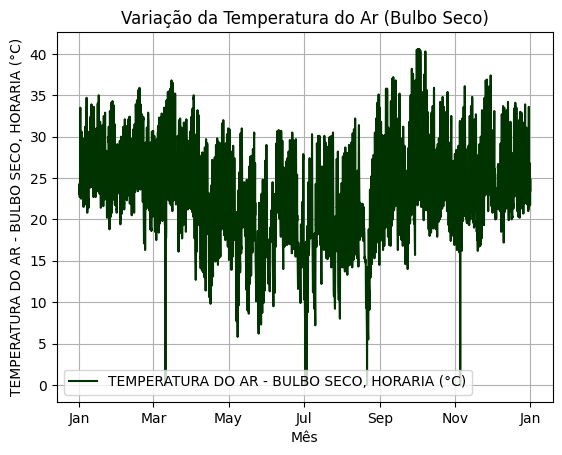

In [80]:
#Gráfico apresenta a "Temperatura do Ar - Bulbo Seco" por Mês
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b')) #Abreviaçao dos meses
plt.plot(df['Data e Hora'], df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'],color='#003300', label='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)')
plt.xlabel('Mês')
plt.ylabel('TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)')
plt.title('Variação da Temperatura do Ar (Bulbo Seco)')
plt.legend()
plt.grid(True)
plt.show()



Persistência dos Resultados no SQLite

In [81]:
#Persistindo o DataFrame no banco de dados
import sqlite3
conn = sqlite3.connect('clima.db') #banco de dados SQLite chamado clima.db será criado.
df.to_sql('clima',conn,if_exists='replace')


8784

O gráfico apresenta a "Temperatura do Ar - Bulbo Seco" medida ao longo do tempo (em Data e hora). A temperatura do ar, medida diretamente com um termômetro de bulbo seco, indica a temperatura real do ar sem influência adicional.
A partir do gráfico, observamos que a temperatura do ar, em grande parte, esteve acima de 15°C. Isso sugere que as condições durante o período analisado foram relativamente moderadas ou quentes.
Em alguns poucos casos, a temperatura caiu abaixo de 15°C, cegando até 0°C. Podemos identificar uma mudança repentina no clima, pode ser útil investigar as causas desses eventos.